
**Task Description:**
You have learned about transformers and their applications in natural language processing. In this assignment, you will apply your knowledge by implementing a transformer-based model to solve a text classification task.


**Dataset:**
You will be using the IMDB movie review dataset, which contains movie reviews labeled as positive or negative sentiment. The dataset will be downloaded and loaded using Python's file handling capabilities.

**Task:**

Your task is to build a transformer-based model using the torch.nn.Transformer module to classify movie reviews as positive or negative sentiment. You can use the provided dataset for training and evaluation.

**Instructions:**

(1) Download and Extract the IMDB Dataset:Run the following script to download and extract the IMDB dataset:

In [1]:
import os
import tarfile
import urllib.request
from torch.utils.data import DataLoader
import torch

# Function to download and extract IMDB dataset
def download_extract_imdb(root="./imdb_data"):
    if not os.path.exists(root):
        os.makedirs(root)

    url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
    filename = os.path.join(root, "aclImdb_v1.tar.gz")
    urllib.request.urlretrieve(url, filename)

    # Extract the tar.gz file
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall(root)

# Download and extract IMDB dataset
# download_extract_imdb()


(2) Load and Preprocess the Dataset:Use the following script to load the IMDB dataset, preprocess it, and tokenize the reviews:

In [2]:
import os
from torchtext.data.utils import get_tokenizer

# Set up tokenizer
tokenizer = get_tokenizer("basic_english")

# Load training data
def load_imdb_data(root="imdb_data/aclImdb"):
    train_data = []
    for label in ["pos", "neg"]:
        label_dir = os.path.join(root, "train", label)
        for filename in os.listdir(label_dir):
            with open(os.path.join(label_dir, filename), "r", encoding="utf-8") as file:
                review = file.read()
                # Tokenize review
                tokenized_review = tokenizer(review)
                train_data.append((tokenized_review, 1 if label == "pos" else 0))
    return train_data

# Load training data
train_data = load_imdb_data()

# Load testing data
def load_test_data(root="imdb_data/aclImdb"):
    test_data = []
    for label in ["pos", "neg"]:
        label_dir = os.path.join(root, "test", label)
        for filename in os.listdir(label_dir):
            with open(os.path.join(label_dir, filename), "r", encoding="utf-8") as file:
                review = file.read()
                # Tokenize review
                tokenized_review = tokenizer(review)
                test_data.append((tokenized_review, 1 if label == "pos" else 0))
    return test_data

# Load testing data
test_data = load_test_data()


/opt/anaconda3/envs/pytorch-env/lib/python3.11/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [3]:
# Display tokenized positive and negative examples
print("Tokenized Positive Example:")
print(train_data[0][0])
print("Tokenized Negative Example:")
print(train_data[len(train_data)//2][0])

Tokenized Positive Example:
['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', '.', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', '!', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', '.', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', '.', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', '.', 'as', 'a', 'police', 'sgt', '.']
Tokenized Negative Example:
['working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', ',', 'this', 'film', 'manages', 'to', 'be', 'creditable', 'to', 'it', "'", 's', 'source', ',', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience', '.', 'branagh', 'steals', 'the', 'film', 'from', 'under', 'fishburne', "'", 's', 'nose', ',', 'and', 'there', "'", 's', 'a', 'talented', 'cast', 'on', 'good', 'form', '.']


In [4]:
# Display tokenized examples with labels for training dataset
print("Training Dataset:")
for review, label in train_data[:3]:
    print("Label:", "Positive" if label == 1 else "Negative")
    print("Tokenized Review:", review)
    print()

# Display tokenized examples with labels for testing dataset
print("Testing Dataset:")
for review, label in test_data[:3]:
    print("Label:", "Positive" if label == 1 else "Negative")
    print("Tokenized Review:", review)
    print()


Training Dataset:
Label: Positive
Tokenized Review: ['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', '.', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', '!', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', '.', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', '.', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', '.', 'as', 'a', 'police', 'sgt', '.']

Label: Positive
Tokenized Review: ['bizarre', 'horror', 'movie', 'filled', 'with', 'famous', 'faces', 'but', 'stolen', 'by', 'cristina', 'raines', '(', 'later', 'of', 'tv', "'", 's', 'flamingo', 'road', ')', 'as', 'a', 'pretty', 'but', 'somewhat', 'unstable', 'model', 'with', 'a', 'gummy', 'smile', 'who', 'is', 'slated', 'to', 'pay', 'for', 'her', 'attempted', 'suicides', 'by', 'guarding', 'the', 'gateway', 'to', 'hell', '!', 'the', 'scenes', 'with', 'raines', 'modeling', 'are',

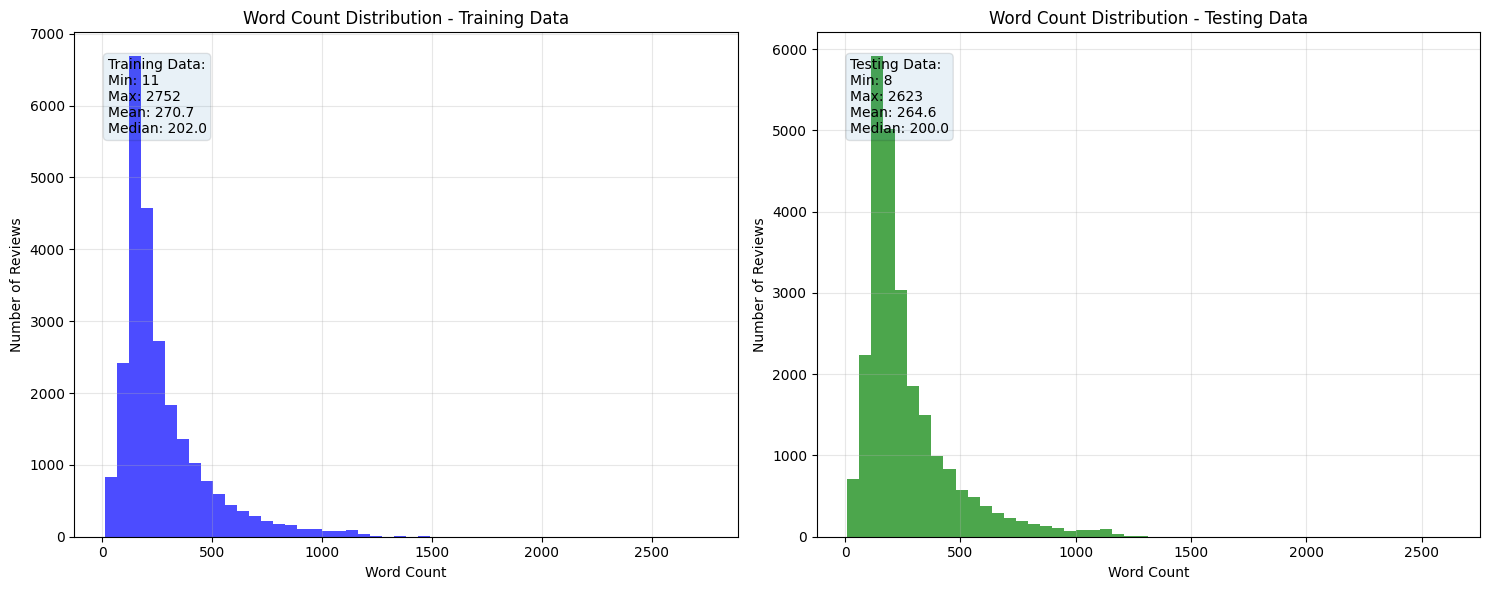

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate word counts for each review
def get_word_counts(data):
    return [len(review) for review, _ in data]

# Calculate word counts
train_word_counts = get_word_counts(train_data)
test_word_counts = get_word_counts(test_data)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for training data
ax1.hist(train_word_counts, bins=50, alpha=0.7, color='blue')
ax1.set_title('Word Count Distribution - Training Data')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Number of Reviews')
ax1.grid(True, alpha=0.3)

# Plot histogram for testing data
ax2.hist(test_word_counts, bins=50, alpha=0.7, color='green')
ax2.set_title('Word Count Distribution - Testing Data')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Number of Reviews')
ax2.grid(True, alpha=0.3)

# Add some statistics as text
train_stats = f"Training Data:\nMin: {min(train_word_counts)}\nMax: {max(train_word_counts)}\nMean: {np.mean(train_word_counts):.1f}\nMedian: {np.median(train_word_counts):.1f}"
test_stats = f"Testing Data:\nMin: {min(test_word_counts)}\nMax: {max(test_word_counts)}\nMean: {np.mean(test_word_counts):.1f}\nMedian: {np.median(test_word_counts):.1f}"

ax1.text(0.05, 0.95, train_stats, transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
ax2.text(0.05, 0.95, test_stats, transform=ax2.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.savefig('word_count_distribution.png')
plt.show()

In [6]:
train_data_trunk = [(review, label) for review, label in train_data if len(review) <= 500]
test_data_trunk = [(review, label) for review, label in test_data if len(review) <= 500]
len(train_data_trunk), len(test_data_trunk)


(22163, 22358)

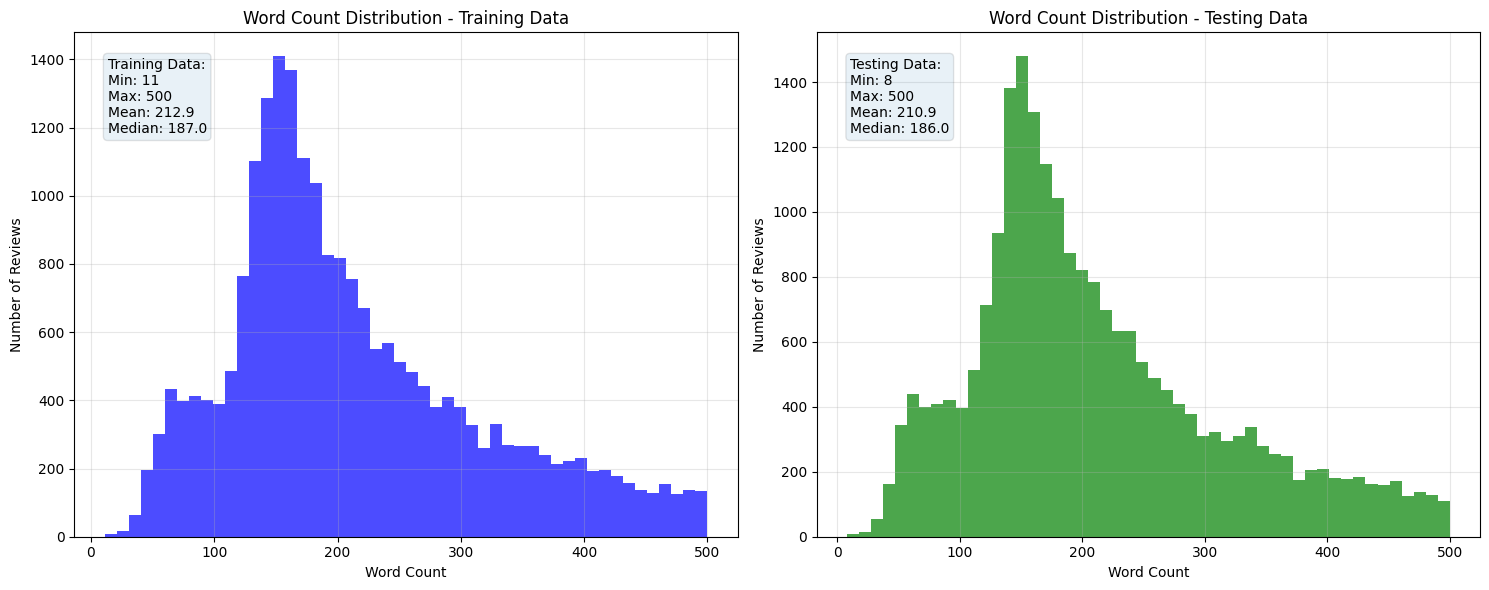

In [7]:
def get_word_counts(data):
    return [len(review) for review, _ in data]

# Calculate word counts
train_word_counts = get_word_counts(train_data_trunk)
test_word_counts = get_word_counts(test_data_trunk)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for training data
ax1.hist(train_word_counts, bins=50, alpha=0.7, color='blue')
ax1.set_title('Word Count Distribution - Training Data')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Number of Reviews')
ax1.grid(True, alpha=0.3)

# Plot histogram for testing data
ax2.hist(test_word_counts, bins=50, alpha=0.7, color='green')
ax2.set_title('Word Count Distribution - Testing Data')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Number of Reviews')
ax2.grid(True, alpha=0.3)

# Add some statistics as text
train_stats = f"Training Data:\nMin: {min(train_word_counts)}\nMax: {max(train_word_counts)}\nMean: {np.mean(train_word_counts):.1f}\nMedian: {np.median(train_word_counts):.1f}"
test_stats = f"Testing Data:\nMin: {min(test_word_counts)}\nMax: {max(test_word_counts)}\nMean: {np.mean(test_word_counts):.1f}\nMedian: {np.median(test_word_counts):.1f}"

ax1.text(0.05, 0.95, train_stats, transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
ax2.text(0.05, 0.95, test_stats, transform=ax2.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.savefig('word_count_distribution.png')
plt.show()

This script loads the IMDB dataset, tokenizes the reviews using the basic_english tokenizer, and displays tokenized examples for both positive and negative sentiment reviews.

(3) Implement the Transformer Model:Implement the Transformer model using the torch.nn.Transformer module.

(4)Train the Model:Define loss function and optimizer, and train the model on the training dataset.

(5) Evaluate the Model:Evaluate the trained model on the testing dataset.

(6) Calculate accuracy and other relevant metrics.

Submission:Submit your implementation along with a brief report describing your model architecture, training procedure, evaluation results, and any insights gained.

In [8]:
def build_vocab(data):
    vocab = set()
    for tokens, _ in data:
        vocab.update(tokens)
    vocab = list(vocab)
    vocab.insert(0, '<UNK>')  # unknown token
    vocab.insert(1, '<PAD>')  # padding token
    vocab_to_idx = {word: idx for idx, word in enumerate(vocab)}
    return vocab_to_idx

vocab_to_idx = build_vocab(train_data)

In [15]:
def collate_batch(batch):
    text, labels = zip(*batch)
    labels = torch.tensor(labels)
    # Find the maximum length of text in the batch
    max_length = max(len(item) for item in text)
    # Create a tensor to hold the padded sequences
    padded_text = torch.zeros((len(text), max_length), dtype=torch.long)
    for i, item in enumerate(text):
        # Fill the tensor with the sequences, leaving the remaining space as padding
        padded_text[i, :len(item)] = torch.tensor([
            vocab_to_idx.get(token, 0) for token in item
        ])
    return padded_text, labels

train_loader = DataLoader(train_data_trunk, batch_size=128, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_data_trunk, batch_size=128, shuffle=False, collate_fn=collate_batch)

In [16]:
from torch.nn.functional import sigmoid
from torch.optim import Adam, SGD
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch import nn


class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(embed_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.permute(1, 0, 2)
        transformer_output = self.transformer_encoder(embedded)
        pooled_output = torch.mean(transformer_output, dim=0)
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

In [19]:
from tqdm.notebook import tqdm
from tqdm.notebook import tqdm

def train_model(model, train_loader, test_loader, num_epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    best_accuracy = 0.0
    
    for epoch in range(num_epochs):
        # TRAINING PHASE
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Create progress bar for training batches
        with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]") as pbar:
            for batch_idx, (data, target) in enumerate(pbar):
                # Forward pass
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                
                # Backward pass and optimize
                loss.backward()
                optimizer.step()
                
                # Calculate metrics
                running_loss += loss.item()
                _, predicted = torch.max(output, 1)  # Get predicted class
                total += target.size(0)
                correct += (predicted == target).sum().item()
                
                # Update progress bar with current batch stats
                accuracy = 100 * correct / total
                avg_loss = running_loss / (batch_idx + 1)
                pbar.set_postfix({
                    'loss': f'{avg_loss:.4f}',
                    'acc': f'{accuracy:.2f}%'
                })
        
        # TESTING PHASE
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0
        
        # Create progress bar for test batches
        with torch.no_grad(), tqdm(test_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Test]") as pbar:
            for batch_idx, (data, target) in enumerate(pbar):
                # Forward pass
                output = model(data)
                loss = criterion(output, target)
                
                # Calculate metrics
                test_loss += loss.item()
                _, predicted = torch.max(output, 1)
                test_total += target.size(0)
                test_correct += (predicted == target).sum().item()
                
                # Update progress bar with current batch stats
                test_accuracy = 100 * test_correct / test_total
                avg_test_loss = test_loss / (batch_idx + 1)
                pbar.set_postfix({
                    'loss': f'{avg_test_loss:.4f}',
                    'acc': f'{test_accuracy:.2f}%'
                })
            if best_accuracy < test_accuracy:
                best_accuracy = test_accuracy
                torch.save(model.state_dict(), 'best_model.pth')
        
        # Print epoch summary
        train_accuracy = 100 * correct / total
        test_accuracy = 100 * test_correct / test_total
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VOCAB_SIZE = len(vocab_to_idx)
EMBED_DIM = 60
NUM_HEADS = 2
HIDDEN_DIM = 60
NUM_LAYERS = 1
NUM_CLASSES = 2

model = TransformerModel(VOCAB_SIZE, EMBED_DIM, NUM_HEADS, HIDDEN_DIM, NUM_LAYERS, NUM_CLASSES).to(device)

train_model(model, train_loader, test_loader, 10, .001)

/opt/anaconda3/envs/pytorch-env/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 1/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 1/10 - Train Loss: 0.6422, Train Acc: 60.80%, Test Loss: 0.5339, Test Acc: 74.20%


Epoch 2/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 2/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 2/10 - Train Loss: 0.4372, Train Acc: 79.88%, Test Loss: 0.4331, Test Acc: 81.80%


Epoch 3/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 3/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 3/10 - Train Loss: 0.3156, Train Acc: 86.63%, Test Loss: 0.4088, Test Acc: 84.30%


Epoch 4/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 4/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 4/10 - Train Loss: 0.2394, Train Acc: 90.49%, Test Loss: 0.4015, Test Acc: 86.02%


Epoch 5/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 5/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 5/10 - Train Loss: 0.1885, Train Acc: 92.93%, Test Loss: 0.3995, Test Acc: 86.65%


Epoch 6/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 6/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 6/10 - Train Loss: 0.1486, Train Acc: 94.75%, Test Loss: 0.6300, Test Acc: 84.00%


Epoch 7/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 7/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 7/10 - Train Loss: 0.1140, Train Acc: 96.17%, Test Loss: 0.5736, Test Acc: 85.07%


Epoch 8/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 8/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 8/10 - Train Loss: 0.0804, Train Acc: 97.55%, Test Loss: 0.7219, Test Acc: 85.50%


Epoch 9/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 9/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 9/10 - Train Loss: 0.0591, Train Acc: 98.29%, Test Loss: 0.9168, Test Acc: 85.11%


Epoch 10/10 [Train]:   0%|          | 0/174 [00:00<?, ?it/s]

Epoch 10/10 [Test]:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 10/10 - Train Loss: 0.0394, Train Acc: 99.01%, Test Loss: 1.1909, Test Acc: 83.83%


In [24]:
model = TransformerModel(VOCAB_SIZE, EMBED_DIM, NUM_HEADS, HIDDEN_DIM, NUM_LAYERS, NUM_CLASSES)
model.load_state_dict(torch.load('best_model.pth'))

model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
criterion = nn.CrossEntropyLoss()

with torch.no_grad(), tqdm(test_loader) as pbar:
    for batch_idx, (data, target) in enumerate(pbar):
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Calculate metrics
        test_loss += loss.item()
        _, predicted = torch.max(output, 1)
        test_total += target.size(0)
        test_correct += (predicted == target).sum().item()
        
        # Update progress bar with current batch stats
        test_accuracy = 100 * test_correct / test_total
        avg_test_loss = test_loss / (batch_idx + 1)
        pbar.set_postfix({
            'loss': f'{avg_test_loss:.4f}',
            'acc': f'{test_accuracy:.2f}%'
        })
print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

/opt/anaconda3/envs/pytorch-env/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


  0%|          | 0/175 [00:00<?, ?it/s]

Test Loss: 0.3995, Test Accuracy: 86.65%


## **Report**

During my tests I discovered a few different optimizations that I had to make. The first was that some data points where extremely long, over 2,000 words, to make my model train in a reasonable time I trunked all data points to those with less than 500.

I also had trouble after doing this with some words not appearing in the training set that appear in the test set. I also had to add padding for each of my batches to make sure that each batch had the same length. To do this I calcualted the max size in the batch then padding each sentence with 0s.